In [1]:
# -*- coding: utf-8 -*-
%matplotlib inline
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score



from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.decomposition import PCA

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

from scipy import stats

pd.set_option('display.max_columns', 30)

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('data_v1.0.csv', header = 0) #loading the CSV as Dataframe

# Reformating the dataset by dropping selected columns

In [3]:
data = data.drop(['Unnamed: 0', 'index', 'date'], axis=1)

#data['year'] = pd.to_datetime(data['date']).apply(lambda x: x.year)
#data['month'] = pd.to_datetime(data['date']).apply(lambda x: x.month)
#data['day'] = pd.to_datetime(data['date']).apply(lambda x: x.day)

In [4]:
data.head()

,cheveux,age,exp,salaire,sexe,diplome,specialite,note,dispo,embauche
0,roux,25.0,9.0,26803.0,F,licence,geologie,97.08,non,0
1,blond,35.0,13.0,38166.0,M,licence,forage,63.86,non,0
2,blond,29.0,13.0,35207.0,M,licence,geologie,78.50,non,0
3,brun,NaN,12.0,32442.0,M,licence,geologie,45.09,non,0
4,roux,35.0,6.0,28533.0,F,licence,detective,81.91,non,0


# Missing Data

In [5]:
data.isnull().values.any() #Dataset contains NaN values

True

Le dataset semble contenir des valeurs manquantes.

In [6]:
data.head()

,cheveux,age,exp,salaire,sexe,diplome,specialite,note,dispo,embauche
0,roux,25.0,9.0,26803.0,F,licence,geologie,97.08,non,0
1,blond,35.0,13.0,38166.0,M,licence,forage,63.86,non,0
2,blond,29.0,13.0,35207.0,M,licence,geologie,78.50,non,0
3,brun,NaN,12.0,32442.0,M,licence,geologie,45.09,non,0
4,roux,35.0,6.0,28533.0,F,licence,detective,81.91,non,0


Nous pouvons observer grace aux premières lignes du dataset que il y a une valeur manquante.

In [7]:
data.isnull().sum() #Displays the amount of NaN values

cheveux       103
age            91
exp            96
salaire        95
sexe          100
diplome       110
specialite     93
note          114
dispo         106
embauche        0
dtype: int64

Nous pouvons observer ici la somme des valuers manquantes du Dataset pour chaque variable. Nous pouvons remarquer que ces valeurs sont relativement faibles comparées aux 20000 observations du dataset.

In [8]:
missing_df = data.isnull().sum(axis=0).reset_index()
missing_df.columns = ['Variable', 'Somme']
missing_df['Pourcentage'] = round((missing_df['Somme'] / data.shape[0])*100)
missing_df

,Variable,Somme,Pourcentage
0,cheveux,103,1.0
1,age,91,0.0
2,exp,96,0.0
3,salaire,95,0.0
4,sexe,100,0.0
5,diplome,110,1.0
6,specialite,93,0.0
7,note,114,1.0
8,dispo,106,1.0
9,embauche,0,0.0


Les valeurs manquantes comptent pour au maximum 1% de leur variable respective. Nous pourrons donc les traiter par suppression sans risquer de perdre un volume trop important de données.

In [9]:
data.drop_duplicates(inplace = True)
data.dropna(inplace=True) #Deleting rows with null values 

Nous supprimons ici les doublons ainsi que les valeurs manquantes dans notre dataframe original.

In [10]:
data.isnull().sum() #Displays the amount of NaN values

cheveux       0
age           0
exp           0
salaire       0
sexe          0
diplome       0
specialite    0
note          0
dispo         0
embauche      0
dtype: int64

Nous pouvons observer qu'il n'y a plus aucune valeur manquante.

# Exploratory Data Analysis

## Data distribution

In [11]:
data['embauche'].value_counts() #Distribution according to the class 'embauche'

0    16914
1     2195
Name: embauche, dtype: int64

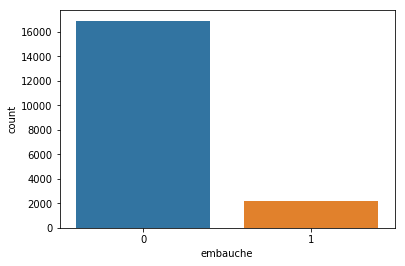

In [12]:
sns.countplot(data['embauche'],label="embauche")

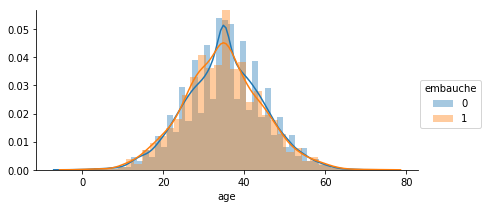

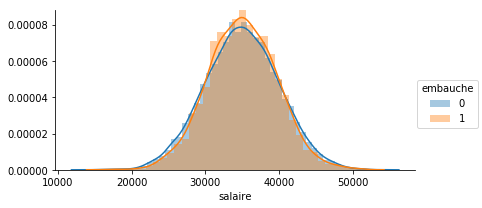

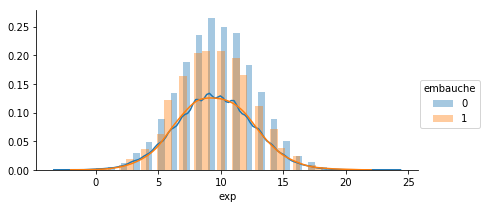

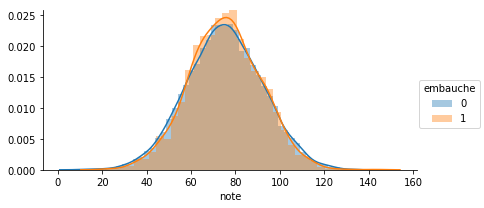

In [13]:
g = sns.FacetGrid(data, hue='embauche', aspect=2)
g.map(sns.distplot, "age").add_legend()

g = sns.FacetGrid(data, hue='embauche', aspect=2)
g.map(sns.distplot, "salaire").add_legend()

g = sns.FacetGrid(data, hue='embauche', aspect=2)
g.map(sns.distplot, "exp").add_legend()

g = sns.FacetGrid(data, hue='embauche', aspect=2)
g.map(sns.distplot, "note").add_legend()

L'ensemble des variables numériques suivent une distribution normale.

## Outliers

### Box plot

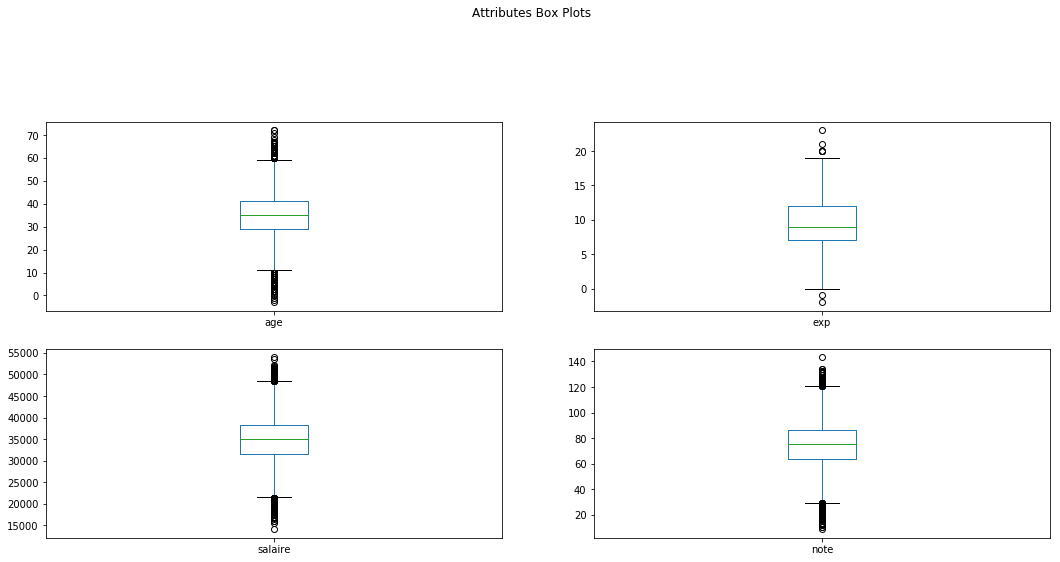

In [14]:
data.drop(['embauche'], axis=1).plot(kind='box', figsize=(18, 16), subplots=True, layout=(4,2), sharex=False, sharey=False, title='Attributes Box Plots')
plt.show()

Les Box Plots nous permettent d'analyser la présence d'outliers en regardant le range des valeurs et les trois quartiles.

In [15]:
data = data.loc[((data['note'] >= 0) & (data['note'] <= 100)) & ((data['age'] >= 17) & (data['age'] <= 62)) & (data['exp'] >= 0)]

In [16]:
first_quartile = data['exp'].describe()['25%']
third_quartile = data['exp'].describe()['75%']

iqr = third_quartile - first_quartile
upper_bound = third_quartile + 1.5 * iqr
lower_bound = first_quartile - 1.5 * iqr

data = data[(data['exp'] > lower_bound) & (data['exp'] < upper_bound)]

In [17]:
first_quartile = data['salaire'].describe()['25%']
third_quartile = data['salaire'].describe()['75%']

iqr = third_quartile - first_quartile
upper_bound = third_quartile + 1.5 * iqr
lower_bound = first_quartile - 1.5 * iqr

data = data[(data['salaire'] > lower_bound) & (data['salaire'] < upper_bound)]

In [18]:
first_quartile = data['age'].describe()['25%']
third_quartile = data['age'].describe()['75%']

iqr = third_quartile - first_quartile
upper_bound = third_quartile + 1.5 * iqr
lower_bound = first_quartile - 1.5 * iqr

data = data[(data['age'] > lower_bound) & (data['age'] < upper_bound)]

In [19]:
first_quartile = data['note'].describe()['25%']
third_quartile = data['note'].describe()['75%']

iqr = third_quartile - first_quartile
upper_bound = third_quartile + 1.5 * iqr
lower_bound = first_quartile - 1.5 * iqr

data = data[(data['note'] > lower_bound) & (data['note'] < upper_bound)]

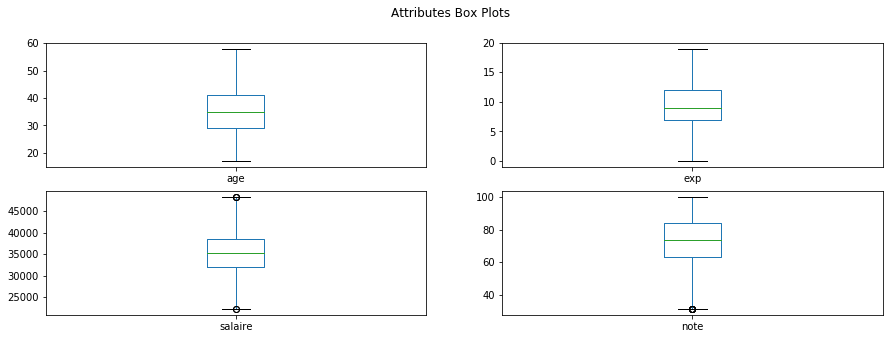

In [20]:
data.drop(['embauche'], axis=1).plot(kind='box', figsize=(15, 5), subplots=True, layout=(2,2), sharex=False, sharey=False, title='Attributes Box Plots')
plt.show()

## Relations

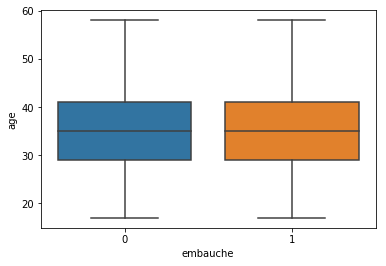

In [21]:
sns.boxplot(x="embauche",y="age", data=data)

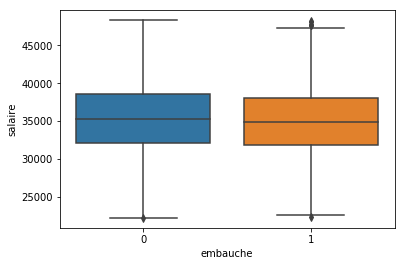

In [22]:
sns.boxplot(x="embauche",y="salaire", data=data)

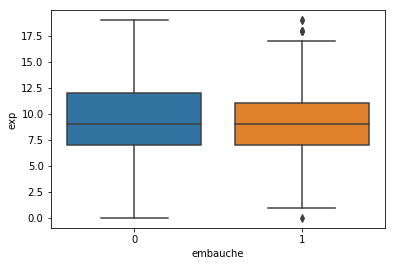

In [23]:
sns.boxplot(x="embauche",y="exp", data=data)

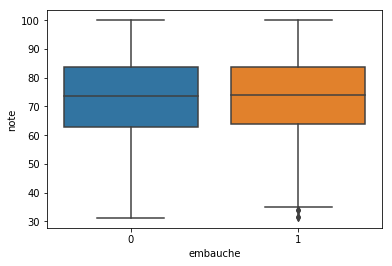

In [24]:
sns.boxplot(x="embauche",y="note", data=data)

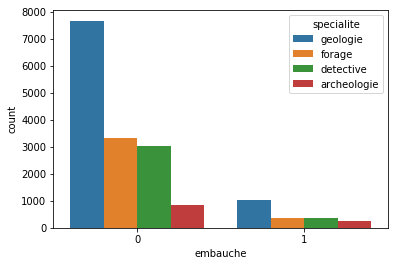

In [25]:
sns.countplot(x="embauche", hue="specialite", data=data)

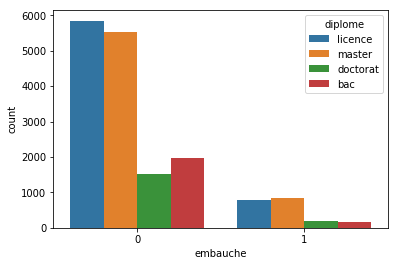

In [26]:
sns.countplot(x="embauche", hue="diplome", data=data)

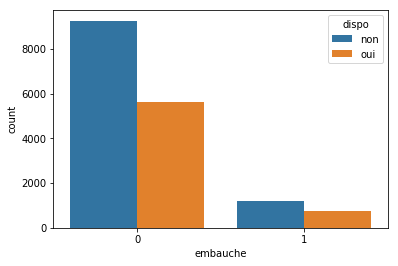

In [27]:
sns.countplot(x="embauche", hue="dispo", data=data)

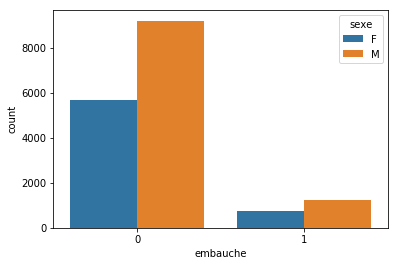

In [28]:
sns.countplot(x="embauche", hue="sexe", data=data)

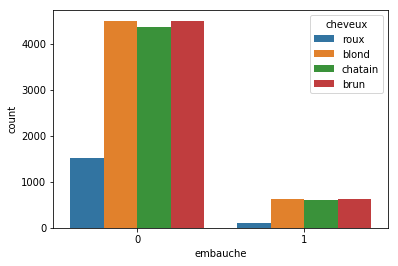

In [29]:
sns.countplot(x="embauche", hue="cheveux", data=data)

## Scatter Matrix 

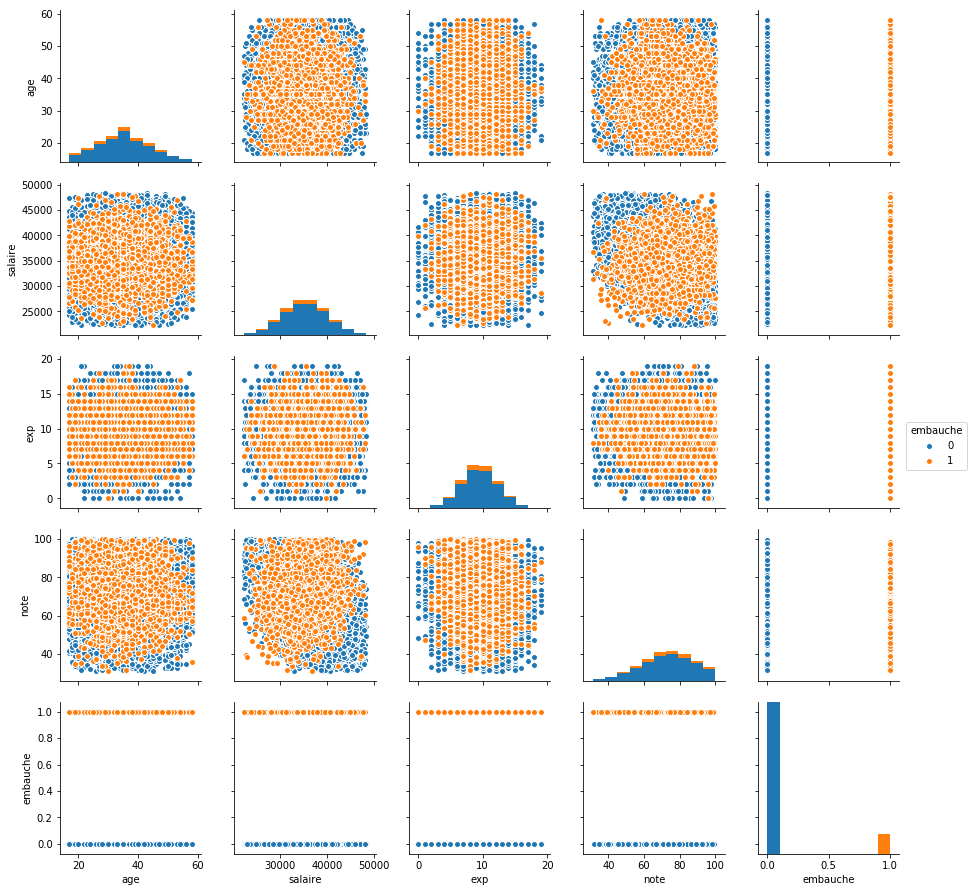

In [30]:
pairplot_cols =["age","salaire","exp","note","embauche"]
sns.pairplot(data[pairplot_cols], hue = 'embauche')

Ce plot de scatter matrix permet de comparer les valeurs numériques avec notre classe embauche afin de voir des éventuelles variables qui mériteraient une analyse plus fournie.

Visuellement, on peut observer une relation entre la note et le salaire qui est représentée par un coefficient négatif sur le scatter plot correspondant.

On pourrait également supposer une faible correlation entre le salaire et l'age en se basant sur l'observation des histogrammes mais cette relation semble bien moins évidente sur leur scatter plot.

### Dépendance Statistiques

#### Specialité & Sexe

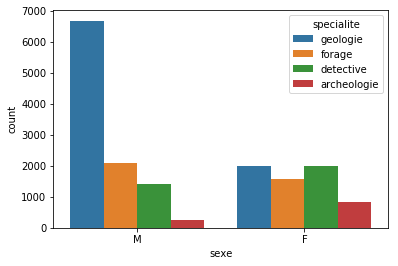

In [31]:
sns.countplot("sexe", data = data, order = data['sexe'].value_counts().index, hue= "specialite")

##### Test d'Indépence Chi2

In [32]:
contingency_table = pd.crosstab(
    data['sexe'],
    data['specialite'],
    margins = True
)

obs = np.array([contingency_table.iloc[0][0:4].values, contingency_table.iloc[1][0:4].values])
g, p, dof, expctd = stats.chi2_contingency(obs)
(g, p, dof)

(2193.8419753219814, 0.0, 3)

Nous avons un résulat significatif, nous pouvons rejeter l'hypothèse (H0), les variables sont dépendantes.

#### Couleur de cheveux & Salaire demandé

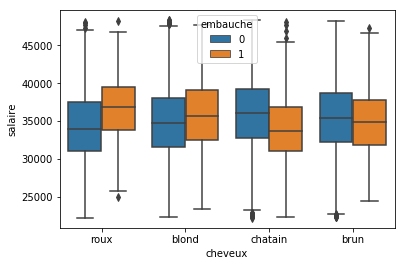

In [33]:
sns.boxplot(x="cheveux",y="salaire", hue="embauche", data=data)

La comparaison de la couleur de cheveux avec le salaire demandé ne laisse apparaître aucune dépendance statistique entre ces deux variables.

#### Expérience & Note

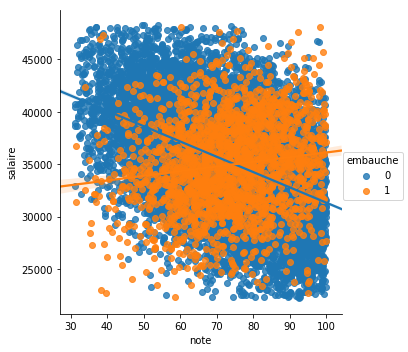

In [34]:
sns.lmplot(x="note", y="salaire", hue="embauche", data=data)

L'analyse graphique du nuage de points laisse présager qu'il n'y a qu'une faible correlation entre le salaire et la note à l'exercice. En effet, nous avons une relation linéaire avec correlation négative car le salaire diminue en fonction de la note. 

In [35]:
stats.pearsonr(data['note'], data['salaire'])

(-0.38463845954825948, 0.0)

Nous avons confirmation d'une correlation négative modérée avec un facteur de -0.40 est une p-value significante.

## Correlations

Nous utiliserons la correlation de Pearson afin d'étudier les relations entre les variables et la classe 'embauche'.

In [36]:
data_encoded = pd.get_dummies(data, columns=['embauche','sexe','dispo','cheveux','diplome','specialite'])

In [37]:
data_encoded.corr(method='pearson')['embauche_1'].sort_values(ascending=False)

embauche_1                1.000000
specialite_archeologie    0.082914
diplome_master            0.032461
cheveux_brun              0.013722
note                      0.013331
dispo_oui                 0.009755
cheveux_blond             0.009040
cheveux_chatain           0.007198
diplome_licence           0.004188
sexe_M                    0.004114
exp                       0.000132
specialite_geologie       0.000082
sexe_F                   -0.004114
diplome_doctorat         -0.006358
dispo_non                -0.009755
specialite_detective     -0.014455
age                      -0.015507
salaire                  -0.025017
specialite_forage        -0.035228
cheveux_roux             -0.046613
diplome_bac              -0.047645
embauche_0               -1.000000
Name: embauche_1, dtype: float64

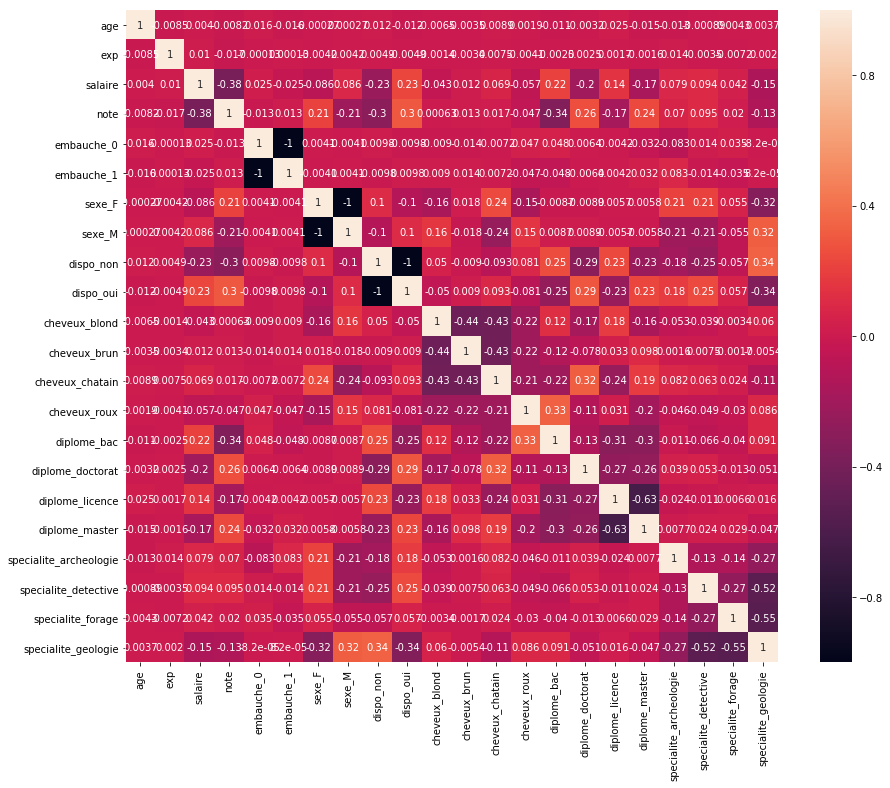

In [38]:
plt.figure(figsize=(15,12))
sns.heatmap(data_encoded.corr(), vmax=1,vmin=-1, annot=True, square=True)

In [39]:
correlations = data.drop('embauche', 1).corr(method='pearson') #Pearson’s Correlation Coefficient

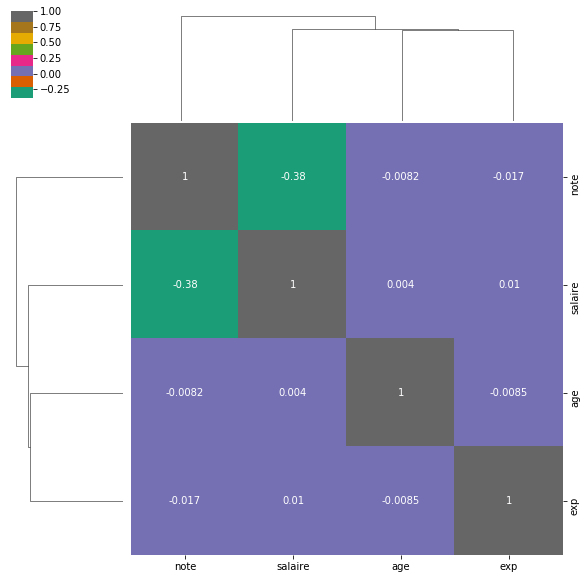

In [40]:
sns.clustermap(correlations,cbar=True,annot=True,square=True,yticklabels=correlations.columns.values,xticklabels=correlations.columns.values,cmap='Dark2')

# Feature Engineering and Selection

## Suppresion des Variables Corrélées 

Des variables corrélées entre elles seront redondantes dans l'établissment de notre modèle. Nous utilisons les observations de nos analyses précédentes pour supprimer une des variables dépendantes en prenant soin de garder celle qui a la meilleure correlation avec la classe.

In [41]:
col_drop = ['sexe', 'salaire']
data = data.drop(col_drop,axis=1)

## One Hot Encoding

In [42]:
data_encoded = pd.get_dummies(data, columns=['dispo','cheveux','diplome','specialite'])

In [43]:
data_encoded.head()

,age,exp,note,embauche,dispo_non,dispo_oui,cheveux_blond,cheveux_brun,cheveux_chatain,cheveux_roux,diplome_bac,diplome_doctorat,diplome_licence,diplome_master,specialite_archeologie,specialite_detective,specialite_forage,specialite_geologie
0,25.0,9.0,97.08,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1
1,35.0,13.0,63.86,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0
2,29.0,13.0,78.50,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1
4,35.0,6.0,81.91,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0
5,37.0,8.0,63.46,1,1,0,0,0,1,0,0,0,0,1,0,0,0,1


L'opération de One Hot Encoding permet de transformer nos variables quantitatives en variables booléennes où chaque catégorie est transformée en nouvelle variable. C'est une opération nécéssaire pour la prédiction avec des modèles qui n'acceptent que des valeurs numérques néanmoins les arbres décisionnels ne requierent pas cette transformation.  

## Data Splitting

In [44]:
X = data_encoded.drop('embauche', axis=1)
y = data_encoded['embauche']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 0)

## Data Scaling

Nous normalisons la données afin qu'elle puisse être traitée par nos modèles. Les données sont des unitées et range différents donc nous la reportons dans le range [0,1]. Les modèles comme de régression linéaire ou Random Forest ne nécessite pas cette étape mais nous allons comparer plusiuers modèles pour trouver le plus optimal donc cela reste une étape obligatoire dans notre cas.

In [45]:
scaler = preprocessing.MinMaxScaler()

scaler.fit(X_train)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

## Feature Selection

### Features importance

In [46]:
model = ExtraTreesClassifier()
model.fit(X_train, y_train)
feature_importance = pd.DataFrame(model.feature_importances_, index = X_train.columns, columns=['importance']).sort_values('importance', ascending=False)
feature_importance.head()

,importance
note,0.389513
age,0.245184
exp,0.175802
specialite_archeologie,0.028722
specialite_geologie,0.025599


# Machine Learning

## Model Comparison

### ROC AUC

In [47]:
seed = 0
metric = 'roc_auc'

models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('GB', GradientBoostingClassifier()))

model_names = []
AUC = []

for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=metric)
    
    model_names.append(name)
    AUC.append(cv_results.mean())

In [48]:
roc_results = pd.DataFrame(
    {'Model': model_names,
     'Auc': AUC,
    })

roc_results.sort_values(by=['Auc'])

,Model,Auc
3,NB,0.587375
0,LR,0.588558
2,CART,0.648320
1,KNN,0.765040
4,SVM,0.796671
5,GB,0.834152


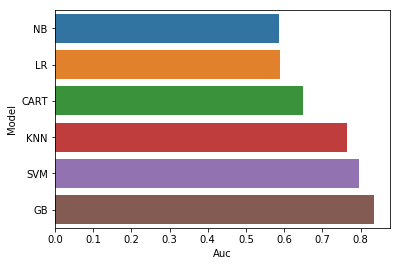

In [49]:
sns.barplot(x="Auc", y="Model", data=roc_results.sort_values(by=['Auc']))

### Scoring results

In [50]:
seed = 0
scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score),
           'auc' : make_scorer(roc_auc_score)}

models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('GB', GradientBoostingClassifier()))

model_names = []
accuracy = []
precision = []
recall = []
f1 = []
auc = []

for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_validate(model, X_train, y_train, cv=kfold, scoring=scoring)
    
    model_names.append(name)
    accuracy.append(cv_results['test_accuracy'].mean())
    precision.append(cv_results['test_precision'].mean())
    recall.append(cv_results['test_recall'].mean())
    f1.append(cv_results['test_f1_score'].mean())
    auc.append(cv_results['test_auc'].mean())

In [51]:
score_results = pd.DataFrame(
    {'Model': model_names,
     'accuracy': accuracy,
     'precision' : precision,
     'recall' : recall,
     'f1': f1,
     'auc' : auc
    })
score_results.sort_values(by=['f1'])

,Model,accuracy,precision,recall,f1,auc
0,LR,0.885646,0.000000,0.000000,0.000000,0.500000
3,NB,0.850950,0.218900,0.120410,0.154816,0.532903
4,SVM,0.891160,0.651180,0.105326,0.179665,0.549015
5,GB,0.898031,0.774453,0.154774,0.257027,0.574456
2,CART,0.848235,0.347703,0.373608,0.358504,0.641665
1,KNN,0.889209,0.524613,0.312866,0.390731,0.638276


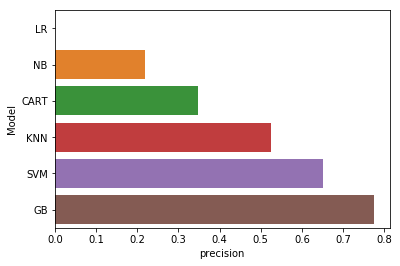

In [52]:
sns.barplot(x="precision", y="Model", data=score_results.sort_values(by=['precision']))

## Hyperparameters Tuning

### Baseline

In [53]:
default_model = GradientBoostingClassifier()
default_model.fit(X_train, y_train)
default_model_pred = default_model.predict(X_test)

default_model_acc = accuracy_score(y_test, default_model_pred)
default_model_mae = mean_absolute_error(y_test, default_model_pred)
default_model_auc = roc_auc_score(y_test, default_model_pred)
default_model_f1 = f1_score(y_test, default_model_pred)

In [54]:
print('accuracy: %0.4f' %default_model_acc)
print('mae: %0.4f' %default_model_mae)
print('auc: %0.4f' %default_model_auc)
print('f1: %0.4f' %default_model_f1)

accuracy: 0.8896
mae: 0.1104
auc: 0.5687
f1: 0.2418


In [55]:
classification_report(y_test, default_model_pred)

'             precision    recall  f1-score   support\n\n          0       0.89      0.99      0.94      4436\n          1       0.75      0.14      0.24       617\n\navg / total       0.88      0.89      0.86      5053\n'

In [56]:
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200, 300]
max_depth = [2, 3, 5, 10, 15]
min_samples_leaf = [1, 2, 4, 6, 8]
min_samples_split = [2, 4, 6, 10]
max_features = [1, 2, 3, 4, 5, 6]

hyperparameter_grid = {
                       'n_estimators': n_estimators,
                       'max_depth': max_depth,
                       'min_samples_leaf': min_samples_leaf,
                       'min_samples_split': min_samples_split,
                       'max_features': max_features}

model = GradientBoostingClassifier()

randomizedsearch_cv = RandomizedSearchCV(estimator=model,
                       param_distributions=hyperparameter_grid,
                       cv=4, n_iter=25, 
                       scoring = 'roc_auc',
                       n_jobs = -1, verbose = 1, 
                       return_train_score = True)
randomizedsearch_cv.fit(X_train, y_train)

Fitting 4 folds for each of 25 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    7.5s finished


RandomizedSearchCV(cv=4, error_score='raise',
          estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False),
          fit_params=None, iid=True, n_iter=25, n_jobs=-1,
          param_distributions={'n_estimators': [1, 2, 4, 8, 16, 32, 64, 100, 200, 300], 'max_depth': [2, 3, 5, 10, 15], 'min_samples_leaf': [1, 2, 4, 6, 8], 'min_samples_split': [2, 4, 6, 10], 'max_features': [1, 2, 3, 4, 5, 6]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, scoring='roc_auc', verbose=1)

In [57]:
randomizedsearch_results = pd.DataFrame(randomizedsearch_cv.cv_results_).sort_values('rank_test_score', ascending = True)
randomizedsearch_results.head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
17,1.244885,0.016411,0.016882,0.001964,300,4,1,6,3,"{'n_estimators': 300, 'min_samples_split': 4, ...",0.854338,0.841575,0.836159,0.840824,0.843224,0.006744,1,0.889421,0.893946,0.895693,0.895285,0.893586,0.002490
7,0.713249,0.009529,0.013520,0.000301,200,10,2,4,3,"{'n_estimators': 200, 'min_samples_split': 10,...",0.856556,0.835798,0.835396,0.838322,0.841518,0.008755,2,0.870825,0.875055,0.877264,0.876729,0.874968,0.002527
20,0.556438,0.002008,0.011648,0.000201,100,10,2,2,5,"{'n_estimators': 100, 'min_samples_split': 10,...",0.850891,0.836068,0.836826,0.836051,0.839959,0.006320,3,0.891809,0.891954,0.898292,0.899490,0.895386,0.003531


In [58]:
randomizedsearch_cv.best_params_

{'max_depth': 3,
 'max_features': 6,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 300}

In [60]:
n_estimators = [100, 150, 200, 250, 300]
max_depth = [2, 3, 5, 7, 8]
min_samples_leaf = [2, 3, 4, 5, 6]
min_samples_split = [2, 3, 4]
max_features = [1, 2, 3, 4]

hyperparameter_grid = {
                       'n_estimators': n_estimators,
                       'max_depth': max_depth,
                       'min_samples_leaf': min_samples_leaf,
                       'min_samples_split': min_samples_split,
                       'max_features': max_features}

model = GradientBoostingClassifier()

grid_search = GridSearchCV(estimator = model, param_grid=hyperparameter_grid, cv = 4, 
                           scoring = 'roc_auc', verbose = 1,
                           n_jobs = -1, return_train_score = True)

grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 1500 candidates, totalling 6000 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   26.5s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   51.0s
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed:  9.6min
[Parallel(n_jobs=-1)]: Done 4984 tasks      | elapsed: 16.3min
[Parallel(n_jobs=-1)]: Done 6000 out of 6000 | elapsed: 25.4min finished


GridSearchCV(cv=4, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [100, 150, 200, 250, 300], 'max_depth': [2, 3, 5, 7, 8], 'min_samples_leaf': [2, 3, 4, 5, 6], 'min_samples_split': [2, 3, 4], 'max_features': [1, 2, 3, 4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=1)

In [61]:
grid_results = pd.DataFrame(grid_search.cv_results_).sort_values('rank_test_score', ascending = True)
grid_results.head(1)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
756,1.129403,0.019605,0.018863,0.000134,5,3,2,3,150,"{'max_depth': 5, 'max_features': 3, 'min_sampl...",0.858563,0.841904,0.841542,0.843892,0.846475,0.007036,1,0.917852,0.918715,0.925881,0.923312,0.92144,0.003299


In [62]:
grid_search.best_params_

{'max_depth': 5,
 'max_features': 3,
 'min_samples_leaf': 2,
 'min_samples_split': 3,
 'n_estimators': 150}

In [63]:
optimized_model = grid_search.best_estimator_
optimized_model.fit(X_train, y_train)
optimized_pred = optimized_model.predict(X_test)

optimized_model_acc = accuracy_score(y_test, optimized_pred)
optimized_model_mae = mean_absolute_error(y_test, optimized_pred)
optimized_model_auc = roc_auc_score(y_test, optimized_pred)
optimized_model_f1 = f1_score(y_test, optimized_pred)

In [64]:
print('accuracy: %0.4f' %optimized_model_acc)
print('mae: %0.4f' %optimized_model_mae)
print('auc: %0.4f' %optimized_model_auc)
print('f1: %0.4f' %optimized_model_f1)

accuracy: 0.8927
mae: 0.1073
auc: 0.6089
f1: 0.3470


In [65]:
classification_report(y_test, optimized_pred)

'             precision    recall  f1-score   support\n\n          0       0.90      0.98      0.94      4436\n          1       0.68      0.23      0.35       617\n\navg / total       0.87      0.89      0.87      5053\n'

In [72]:
print('Amélioration de {:0.2f}%.'.format( 100 * (optimized_model_auc - default_model_auc) / default_model_auc))

Amélioration de 7.06%.


L'étape de paramètrage apporte une amélioration de 7.06% de la valeur de AUC. le modèle a donc bien été amélioré.

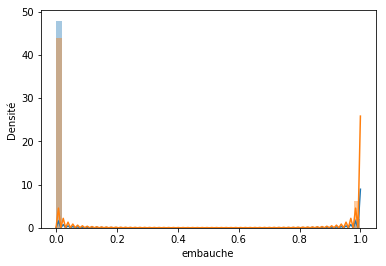

In [70]:
sns.distplot(optimized_pred, label = 'Predictions')
sns.distplot(y_test, label = 'Valeurs')
plt.ylabel('Densité')

### Feature Importance

In [73]:
feature_importance = pd.DataFrame({'feature': X_train.columns, 
                                  'importance': optimized_model.feature_importances_})

feature_importance.head(3)

,feature,importance
0,age,0.110263
1,exp,0.096319
2,note,0.381340


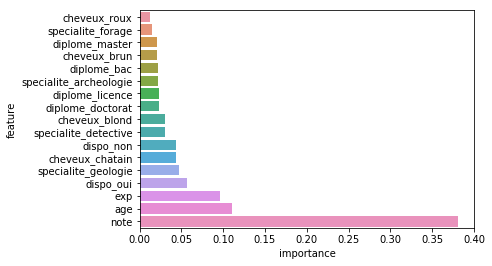

In [74]:
sns.barplot(x="importance", y="feature", data=feature_importance.sort_values(by=['importance']))

### Best Features Training

In [75]:
best_features = feature_importance['feature'][:3]

In [76]:
X_train_reduced = X_train[['note','age', 'exp']]
X_test_reduced = X_test[['note','age', 'exp']]

In [77]:
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)
best_model_predictions = best_model.predict(X_test)

best_acc = accuracy_score(y_test, best_model_predictions)
best_mae = mean_absolute_error(y_test, best_model_predictions)
best_auc = roc_auc_score(y_test, best_model_predictions)
best_f1 = f1_score(y_test, best_model_predictions)

In [78]:
print('accuracy: %0.4f' %best_acc)
print('mae: %0.4f' %best_mae)
print('auc: %0.4f' %best_auc)
print('f1: %0.4f' %best_f1)

accuracy: 0.8908
mae: 0.1092
auc: 0.6078
f1: 0.3429


In [81]:
classification_report(y_test, best_model_predictions)

'             precision    recall  f1-score   support\n\n          0       0.90      0.98      0.94      4436\n          1       0.65      0.23      0.34       617\n\navg / total       0.87      0.89      0.87      5053\n'